In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## **1. Import the Data**

In [2]:
#IMPORT THE DATA

#df = pd.read_csv('https://raw.githubusercontent.com/jdpate/IST-718_GROUP_PROJ/master/actuals_defects_vs_completed_work.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")

#Data minus outlier
df = pd.read_csv('https://raw.githubusercontent.com/jdpate/IST-718_GROUP_PROJ/master/actuals_defects_vs_completed_work_minus_outlier.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")

#print data tpyes of each column
print("Column Names and their respective data types:\n")
print(df.dtypes)

# Check the number of rows and columns
print("\nDimensions of Data Frame is:",df.shape)


Column Names and their respective data types:

WORKCENTER            object
WEEK_ENDING           object
WKOR_PRODUCT_CODE     object
SumOfstdhours        float64
SumOfOThours         float64
SumOfdthrs           float64
SumOftotalhrs        float64
comp_work            float64
PTB                   object
defects              float64
SumOfREWORK_HRS      float64
SumOfREPAIR_HRS      float64
SumOfREFAB_HRS       float64
totrwkhrs            float64
total_def_cost       float64
dtype: object

Dimensions of Data Frame is: (9527, 15)


##**2. Initial Examination of the Import and Data Preparation**

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



(array([493.,  90.,  62.,  13.,  12.,   2.,   2.,   2.,   1.,   2.]),
 array([5.000000e-03, 7.092930e+01, 1.418536e+02, 2.127779e+02,
        2.837022e+02, 3.546265e+02, 4.255508e+02, 4.964751e+02,
        5.673994e+02, 6.383237e+02, 7.092480e+02]),
 <a list of 10 Patch objects>)

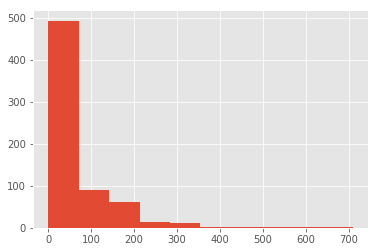

In [3]:
#histogram for complete hours--part of ptb calculation
sampledf = df.sample(1000)
sampledf = sampledf[sampledf['comp_work'] != '0']
x=sampledf['comp_work']

plt.hist(x, bins=10)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(array([837.,  98.,  34.,  18.,   8.,   3.,   1.,   0.,   0.,   1.]),
 array([   0.  ,  104.64,  209.28,  313.92,  418.56,  523.2 ,  627.84,
         732.48,  837.12,  941.76, 1046.4 ]),
 <a list of 10 Patch objects>)

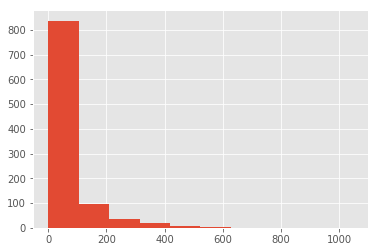

In [4]:
#histogram for SumOftotalhrs--part of ptb calculation

sampledf = df.sample(1000)
sampledf = sampledf[sampledf['SumOftotalhrs'] != '0']
x=sampledf['SumOftotalhrs']

plt.hist(x, bins=10)

### 2a. Print First Few Rows###

In [5]:
#Take a peek at first few rows
df.sort_values(by=['PTB'], ascending=False).head()

#df.head()


,WORKCENTER,WEEK_ENDING,WKOR_PRODUCT_CODE,SumOfstdhours,SumOfOThours,SumOfdthrs,SumOftotalhrs,comp_work,PTB,defects,SumOfREWORK_HRS,SumOfREPAIR_HRS,SumOfREFAB_HRS,totrwkhrs,total_def_cost
8560,J0921201,3/9/2019,WA,65.9,17.0,0.0,82.9,82.870,99.96%,NaN,NaN,NaN,NaN,NaN,NaN
2185,J0222101,10/6/2018,BW,37.1,32.5,0.0,69.6,69.572,99.96%,21.0,0.0,4.0,0.0,4.0,686.0
5002,J0747505,10/20/2018,BW,143.2,32.3,8.0,183.5,183.404,99.95%,1.0,1.0,0.0,0.0,1.0,126.0
5562,J0747703,8/25/2018,BW,26.7,0.0,0.0,26.7,26.675,99.91%,NaN,NaN,NaN,NaN,NaN,NaN
4684,J0747221,11/10/2018,BW,82.8,21.8,26.1,130.7,130.534,99.87%,NaN,NaN,NaN,NaN,NaN,NaN


### 2b. Print Column Names, Data Type, and Shape###

In [6]:
#print data tpyes of each column
print("Column Names and their respective data types:\n")
print(df.dtypes)

# Check the number of rows and columns
print("\nDimensions of Data Frame is:",df.shape)

Column Names and their respective data types:

WORKCENTER            object
WEEK_ENDING           object
WKOR_PRODUCT_CODE     object
SumOfstdhours        float64
SumOfOThours         float64
SumOfdthrs           float64
SumOftotalhrs        float64
comp_work            float64
PTB                   object
defects              float64
SumOfREWORK_HRS      float64
SumOfREPAIR_HRS      float64
SumOfREFAB_HRS       float64
totrwkhrs            float64
total_def_cost       float64
dtype: object

Dimensions of Data Frame is: (9527, 15)


### 2c. Make Column Names Consistent###

In [7]:
# make column names lower case for consistency
# Many ways to do this; I found follwing the shortest. 
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

#print and verify column names are all in lowercase
print("**Column names BEFORE clean-up:**\n")
print(df.columns)

# Note that some column names have underscores and some don't
# So let's make it consistent by renaming them and in some cases by adding more descriptive name

df.rename(columns={'workcenter':'work_center',
                          'ptb':'ptb_percentage',
                          'wkor_product_code':'work_product_code',
                          'sumofstdhours':'sum_of_std_hours',
                          'sumofothours':'sum_of_ot_hours',
                          'sumofdthrs':'sum_of_dt_hrs',
                          'sumoftotalhrs':'sum_of_total_hrs',
                          'sumofrework_hrs':'sum_of_rework_hrs',
                          'sumofrepair_hrs':'sum_of_repair_hrs',
                          'sumofrefab_hrs':'sum_of_refab_hrs',
                          'totrwkhrs':'tot_rwk_hrs',},inplace=True)


print("\n**Column names AFTER clean-up:**\n")

print(df.columns)

**Column names BEFORE clean-up:**

Index(['workcenter', 'week_ending', 'wkor_product_code', 'sumofstdhours',
       'sumofothours', 'sumofdthrs', 'sumoftotalhrs', 'comp_work', 'ptb',
       'defects', 'sumofrework_hrs', 'sumofrepair_hrs', 'sumofrefab_hrs',
       'totrwkhrs', 'total_def_cost'],
      dtype='object')

**Column names AFTER clean-up:**

Index(['work_center', 'week_ending', 'work_product_code', 'sum_of_std_hours',
       'sum_of_ot_hours', 'sum_of_dt_hrs', 'sum_of_total_hrs', 'comp_work',
       'ptb_percentage', 'defects', 'sum_of_rework_hrs', 'sum_of_repair_hrs',
       'sum_of_refab_hrs', 'tot_rwk_hrs', 'total_def_cost'],
      dtype='object')


### 2d. Remove Symbols ###


In [8]:
#there is at least 1 column where there are symbols. Lets remove that.
df['ptb_percentage'] = df['ptb_percentage'].str.replace("%",'')
#verify
df.head()

,work_center,week_ending,work_product_code,sum_of_std_hours,sum_of_ot_hours,sum_of_dt_hrs,sum_of_total_hrs,comp_work,ptb_percentage,defects,sum_of_rework_hrs,sum_of_repair_hrs,sum_of_refab_hrs,tot_rwk_hrs,total_def_cost
0,410034,7/20/2019,BA,0.7,0.0,0.0,0.7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,410035,7/20/2019,BA,0.7,0.0,0.0,0.7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,J0022701,8/25/2018,BW,6.5,0.0,0.0,6.5,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,J0022709,12/22/2018,BW,8.0,0.0,0.0,8.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,J0040402,4/13/2019,WA,0.2,0.0,0.0,0.2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


### 2e. Check the Completeness of Data###

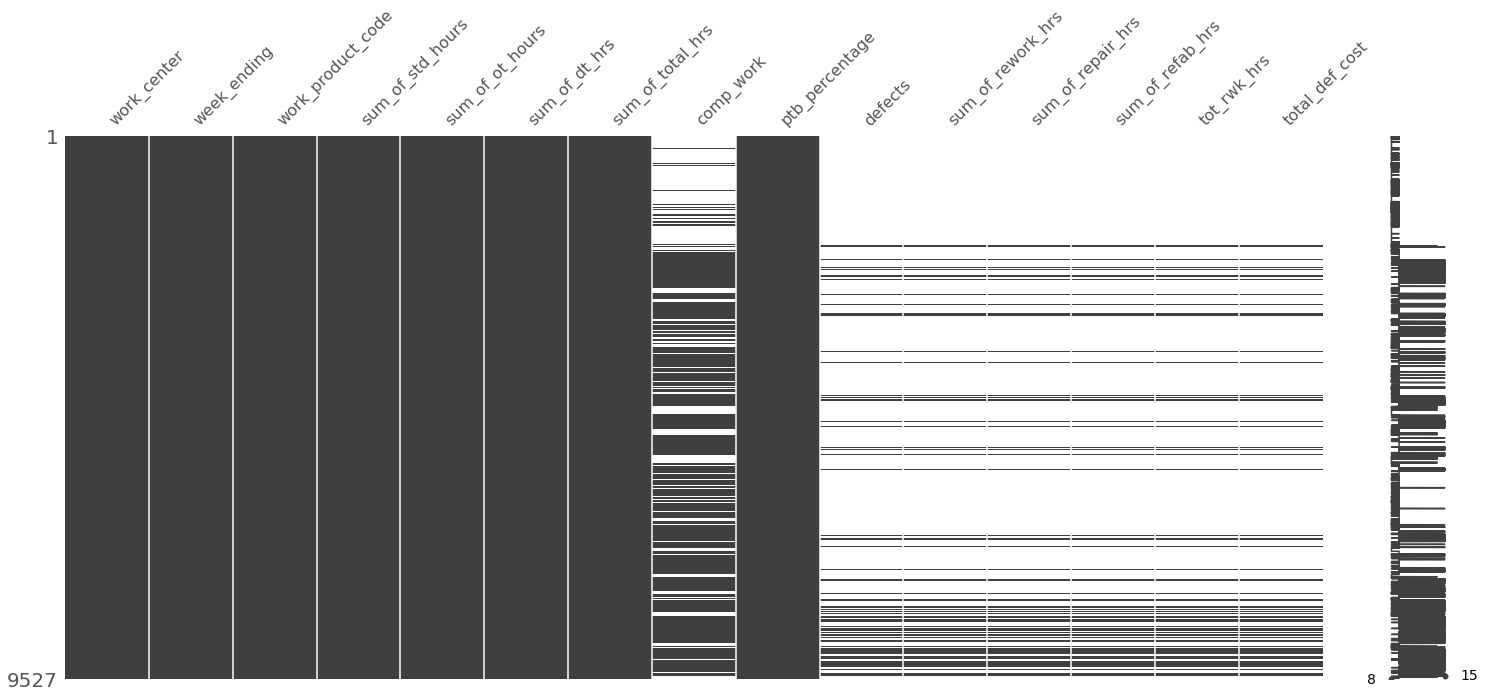

In [9]:
#Look at distribution of missing data among rows and columns
import missingno as msno
#Source: https://github.com/ResidentMario/missingno

#Black = data present
#White = NaN values
#sns.heatmap(df.isnull(), cbar = False)
msno.matrix(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


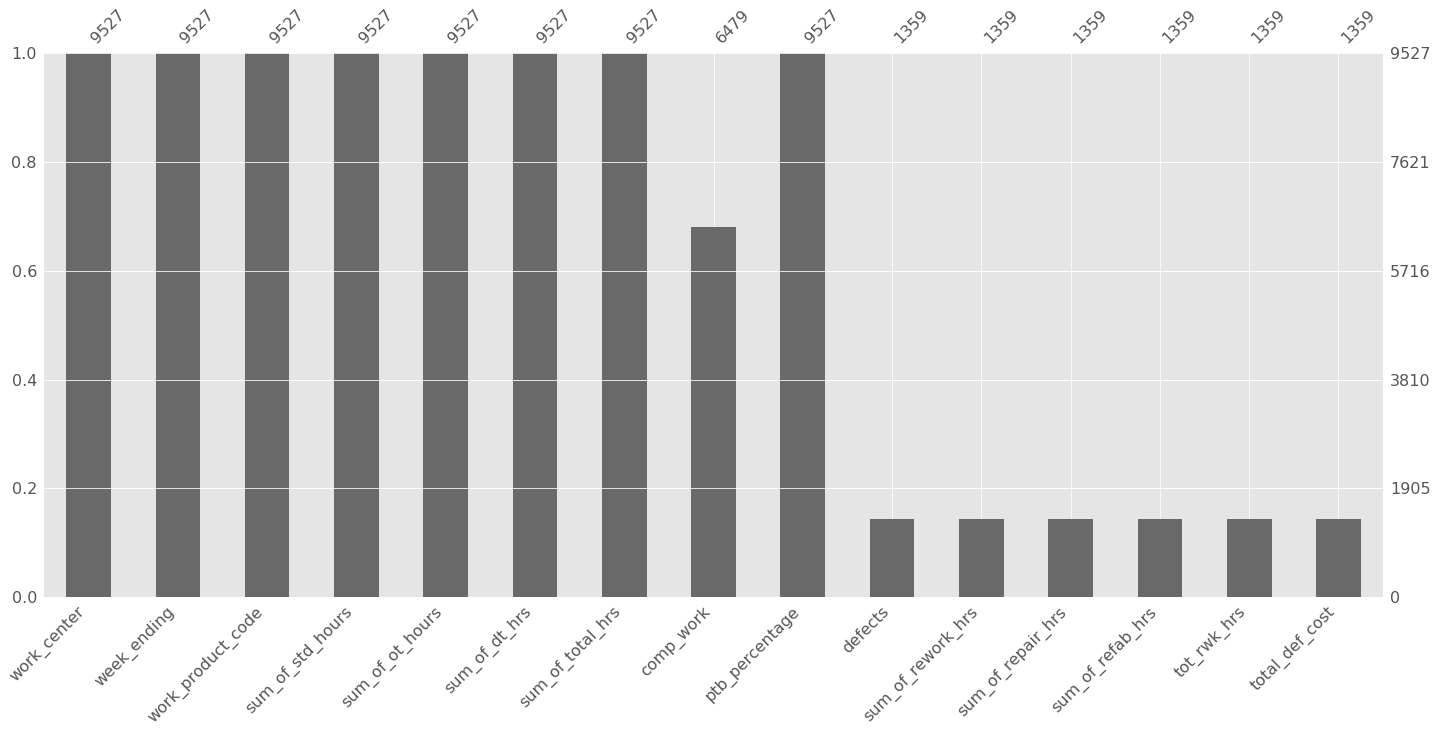

In [10]:
#Proportion of data (by column) with data
msno.bar(df)

###2f. Convert (Undefined values) NaN to Zeros


Since there are multiple columns within the dataframe that have NaN values, lets convert that to zeros. 




In [11]:
df['comp_work'] = df['comp_work'].fillna(0)
df['defects'] = df['defects'].fillna(0)
df['sum_of_rework_hrs'] = df['sum_of_rework_hrs'].fillna(0)
df['sum_of_repair_hrs'] = df['sum_of_repair_hrs'].fillna(0)
df['sum_of_refab_hrs'] = df['sum_of_refab_hrs'].fillna(0)
df['tot_rwk_hrs'] = df['tot_rwk_hrs'].fillna(0)
df['total_def_cost'] = df['total_def_cost'].fillna(0)

  
#verify
df.head()
  

,work_center,week_ending,work_product_code,sum_of_std_hours,sum_of_ot_hours,sum_of_dt_hrs,sum_of_total_hrs,comp_work,ptb_percentage,defects,sum_of_rework_hrs,sum_of_repair_hrs,sum_of_refab_hrs,tot_rwk_hrs,total_def_cost
0,410034,7/20/2019,BA,0.7,0.0,0.0,0.7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,410035,7/20/2019,BA,0.7,0.0,0.0,0.7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,J0022701,8/25/2018,BW,6.5,0.0,0.0,6.5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,J0022709,12/22/2018,BW,8.0,0.0,0.0,8.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,J0040402,4/13/2019,WA,0.2,0.0,0.0,0.2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2g. Convert Data Types Where Needed###

In [12]:
#We know that week_ending has to be in date time format for our time series analysis
#so lets get the object data converted to datetime
df['week_ending'] = pd.to_datetime(df['week_ending'])

df['ptb_percentage'] = pd.to_numeric(df['ptb_percentage'],errors='coerce') 
#remove NaN resulting from errors='coerce'
df['ptb_percentage'] = df['ptb_percentage'].fillna(0)

#verify data types
print(df.dtypes)


work_center                  object
week_ending          datetime64[ns]
work_product_code            object
sum_of_std_hours            float64
sum_of_ot_hours             float64
sum_of_dt_hrs               float64
sum_of_total_hrs            float64
comp_work                   float64
ptb_percentage              float64
defects                     float64
sum_of_rework_hrs           float64
sum_of_repair_hrs           float64
sum_of_refab_hrs            float64
tot_rwk_hrs                 float64
total_def_cost              float64
dtype: object


### **2h. Add Derived Fields to the Data Frame**

In [0]:
#this code block adds pq1k, which is a derived data, into the existing data frame

#create list 1 with nan replaced with zeros becuase sum can either be zero or an 
#integer. Nan in our raw data, in this column, is actually a zero
completed_hrs_as_list= df["sum_of_total_hrs"].fillna(0).tolist()

completed_hrs_as_list_per_1k = []
for each_item in completed_hrs_as_list:
    hrs_per_1k = (each_item/1000)
    completed_hrs_as_list_per_1k.append(hrs_per_1k)
    
#verify
#print(completed_hrs_as_list_per_1k[1:5])

#create list 2 with nan replaced with zeros
defects_as_list_null_to_zero= df["defects"].fillna(0).tolist()
#verify
#print(defects_as_list[1:10])

#divide one list by other to get PQ1K
pq1k = []


for each_defect, each_comp_hrs in zip(defects_as_list_null_to_zero, completed_hrs_as_list_per_1k):
    #add a try catch block to avoid getting ZeroDvisionError
    #there are some instances where completed hours are zeros. 
    #So that was giving issues;I added this try catch block to resolve that
    try:
      a = each_defect/each_comp_hrs
    except ZeroDivisionError:
      a = 0
    pq1k.append(a)
  



In [14]:
df["pq1k"]=pq1k
df.sort_values(by=['pq1k'], ascending=False).head()



,work_center,week_ending,work_product_code,sum_of_std_hours,sum_of_ot_hours,sum_of_dt_hrs,sum_of_total_hrs,comp_work,ptb_percentage,defects,sum_of_rework_hrs,sum_of_repair_hrs,sum_of_refab_hrs,tot_rwk_hrs,total_def_cost,pq1k
3115,J0742303,2018-08-11,MD,0.1,0.0,0.0,0.1,146.469,146469.00,14.0,0.0,0.0,0.0,0.0,1488.0,140000.000000
3786,J0744458,2018-11-17,BC,0.0,0.0,0.1,0.1,0.568,568.00,2.0,2.1,0.0,0.0,2.1,760.0,20000.000000
5097,J0747507,2019-04-20,BC,0.4,0.0,0.0,0.4,1.136,284.00,8.0,0.0,0.0,0.0,0.0,2393.0,20000.000000
3255,J0742306,2018-08-11,MD,1.2,0.0,0.0,1.2,13.261,1105.08,19.0,0.0,0.0,0.0,0.0,992.0,15833.333333
5085,J0747507,2019-01-12,BC,0.0,0.1,0.0,0.1,0.004,4.00,1.0,0.0,0.0,0.0,0.0,248.0,10000.000000


In [15]:
#remove outlier
df = df.drop(df.index[3115])

df.sort_values(by=['pq1k'], ascending=False).head()

,work_center,week_ending,work_product_code,sum_of_std_hours,sum_of_ot_hours,sum_of_dt_hrs,sum_of_total_hrs,comp_work,ptb_percentage,defects,sum_of_rework_hrs,sum_of_repair_hrs,sum_of_refab_hrs,tot_rwk_hrs,total_def_cost,pq1k
5097,J0747507,2019-04-20,BC,0.4,0.0,0.0,0.4,1.136,284.00,8.0,0.0,0.0,0.0,0.0,2393.0,20000.000000
3786,J0744458,2018-11-17,BC,0.0,0.0,0.1,0.1,0.568,568.00,2.0,2.1,0.0,0.0,2.1,760.0,20000.000000
3255,J0742306,2018-08-11,MD,1.2,0.0,0.0,1.2,13.261,1105.08,19.0,0.0,0.0,0.0,0.0,992.0,15833.333333
5085,J0747507,2019-01-12,BC,0.0,0.1,0.0,0.1,0.004,4.00,1.0,0.0,0.0,0.0,0.0,248.0,10000.000000
3257,J0742306,2018-08-25,MD,1.3,0.0,0.0,1.3,1.160,89.23,9.0,0.0,0.0,0.0,0.0,1488.0,6923.076923


## **4. Priliminary Visual Analysis**

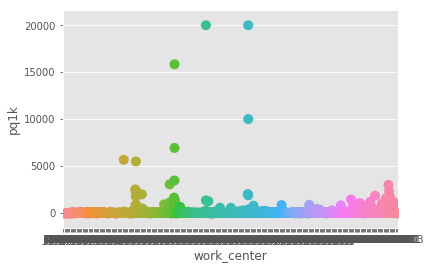

In [16]:
import seaborn as sns
sns.swarmplot(x="work_center", y="pq1k", data=df, size=10)



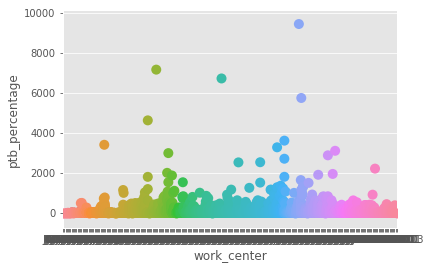

In [17]:
sns.swarmplot(x="work_center", y="ptb_percentage", data=df, size=10)

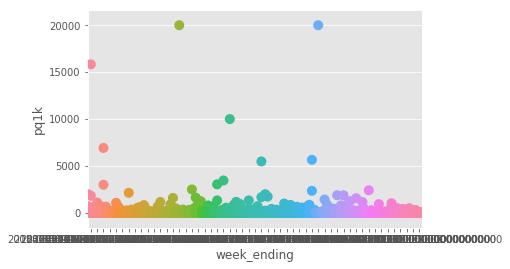

In [18]:
sns.swarmplot(x="week_ending", y="pq1k", data=df, size=10)

From the scatterplots above it is apparent that there are a few work centers that have excessively high value of pq1K. So we will explore this further.

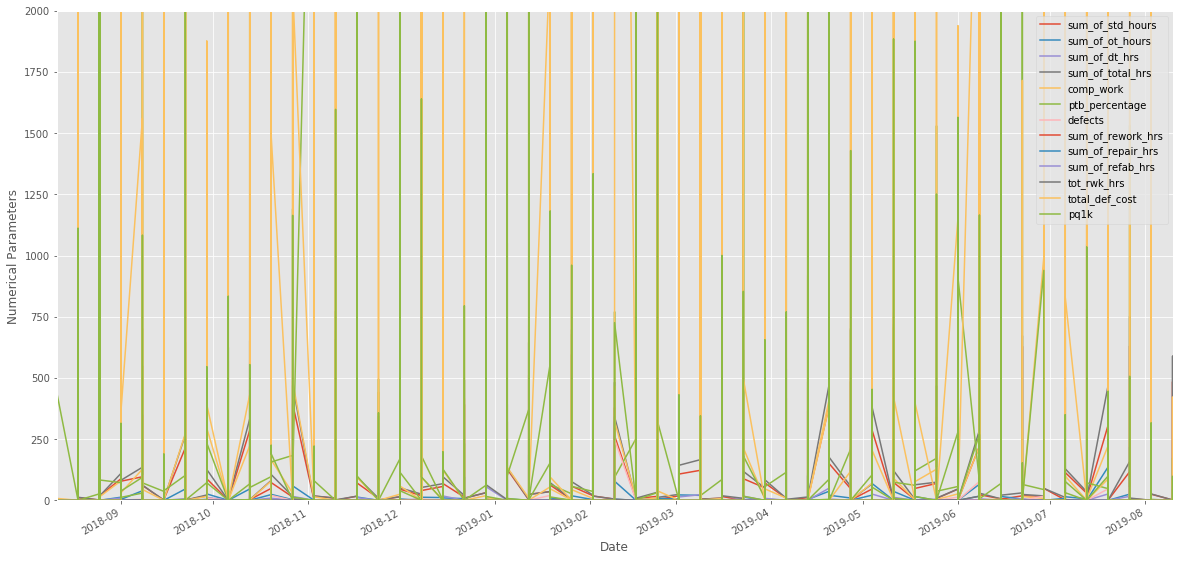

In [19]:
ax = df.set_index('week_ending').plot(figsize=(20, 10))
ax.set_ylim([0, 2000])
ax.set_ylabel('Numerical Parameters')
ax.set_xlabel('Date')

plt.show()

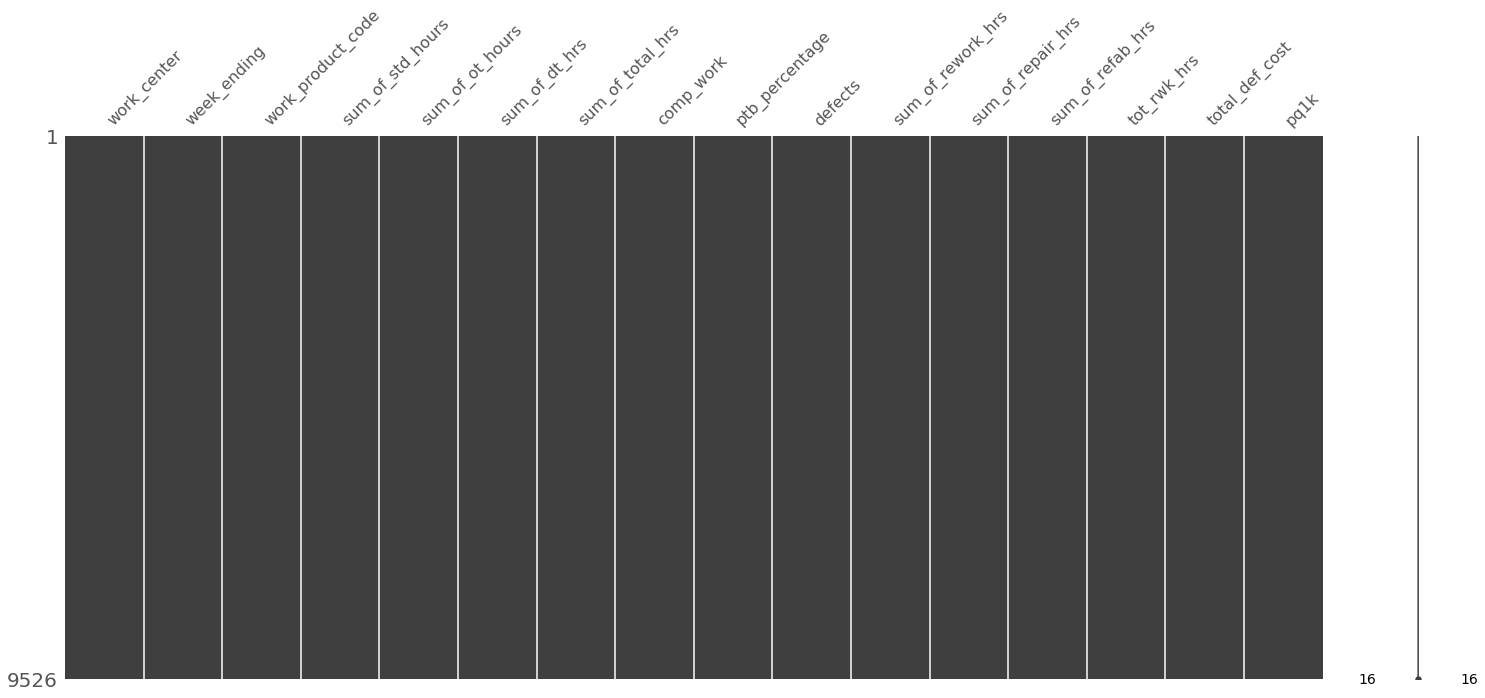

In [20]:
#Data completeness chart after filling in na with zeros

#Look at distribution of missing data among rows and columns
import missingno as msno
#Source: https://github.com/ResidentMario/missingno

#Black = data present
#White = NaN values
#sns.heatmap(df.isnull(), cbar = False)
msno.matrix(df)

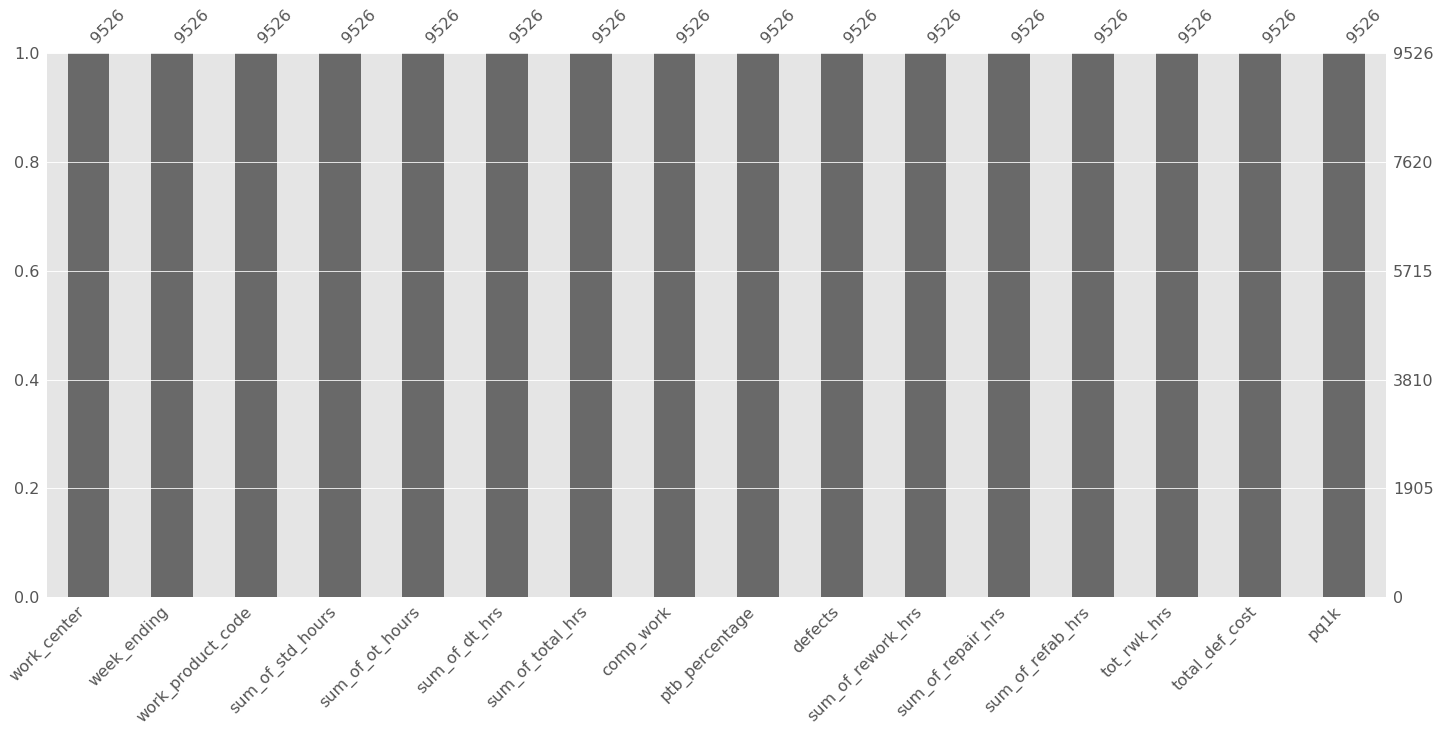

In [21]:
#Proportion of data (by column) with data
msno.bar(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:913: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0

/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:913: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0



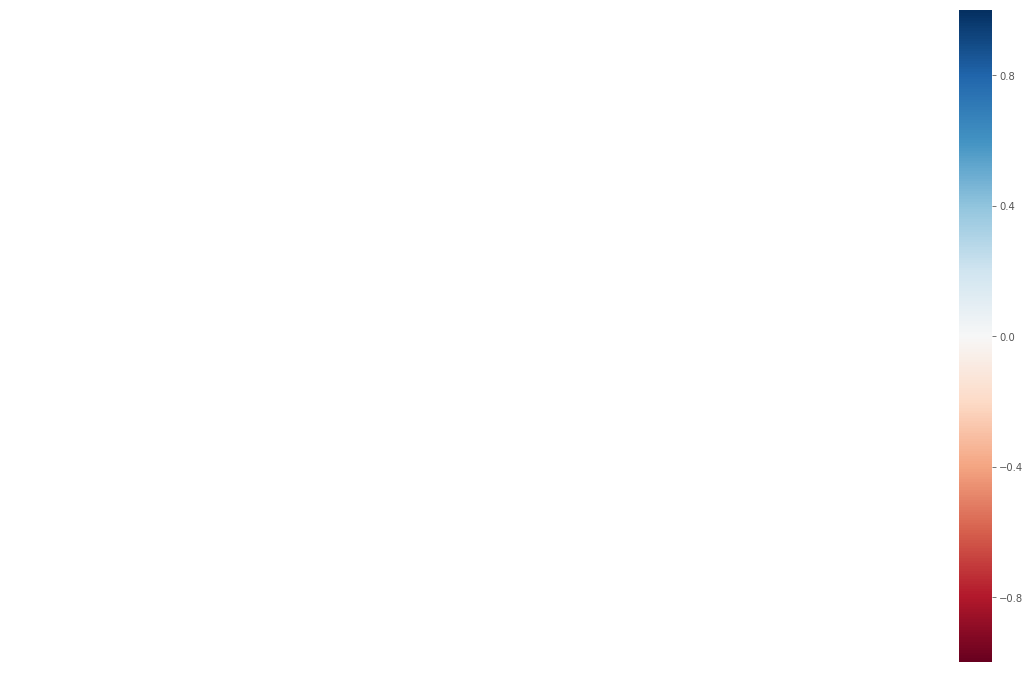

In [22]:
msno.heatmap(df)

## **4. Subsetting Data Frame for Time Series Analysis and Prediction**

### 4.1. Model and Predict Total Hours Taken Each Week

In [23]:
predictdf = df.drop(columns = ['work_center', 'work_product_code', 'sum_of_std_hours', 'sum_of_ot_hours', 'sum_of_dt_hrs', 'comp_work', 'ptb_percentage', 'defects', 'sum_of_rework_hrs', 'sum_of_repair_hrs', 'sum_of_refab_hrs', 'total_def_cost', 'tot_rwk_hrs','pq1k'])

predictdf.head()


,week_ending,sum_of_total_hrs
0,2019-07-20,0.7
1,2019-07-20,0.7
2,2018-08-25,6.5
3,2018-12-22,8.0
4,2019-04-13,0.2


In [24]:
predictdf = predictdf.set_index('week_ending')
#predictdf.head()
predictdf.index = pd.to_datetime(predictdf.index)
predictdf.reset_index(level=0, inplace=True)
predictdf = predictdf.rename(index=str, columns={"sum_of_total_hrs": "y", "week_ending": "ds"})
predictdf.head()


,ds,y
0,2019-07-20,0.7
1,2019-07-20,0.7
2,2018-08-25,6.5
3,2018-12-22,8.0
4,2019-04-13,0.2


In [25]:
m = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False, seasonality_prior_scale=0.1)
m.fit(predictdf)
future = m.make_future_dataframe(periods=25, freq='W')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9546,2019-12-29,72.181630,-50.629632,189.862457
9547,2020-01-05,72.470903,-56.126142,197.758290
9548,2020-01-12,83.101214,-43.738672,208.262615
9549,2020-01-19,93.841501,-23.785205,220.726547
9550,2020-01-26,95.795341,-32.221404,215.209310


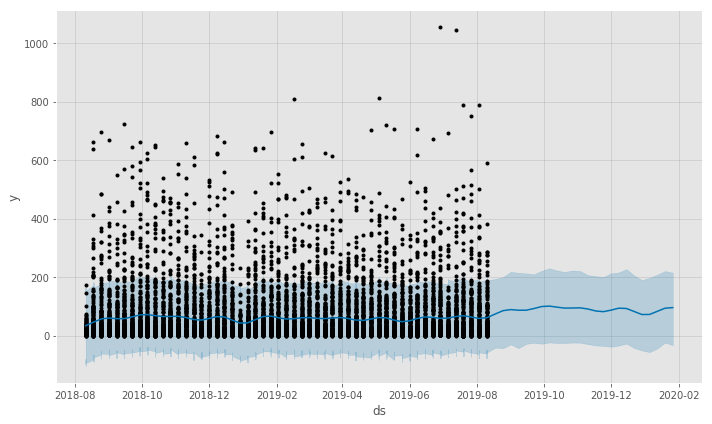

In [26]:
#m.set_xlim([0, 10])
fig1 = m.plot(forecast, uncertainty = True)

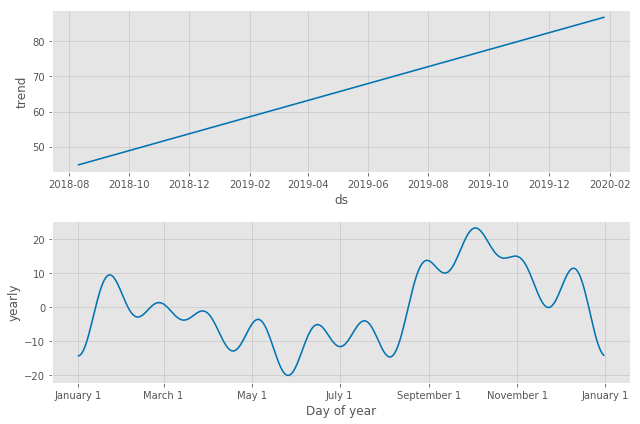

In [27]:
fig2 = m.plot_components(forecast)

### 4.2. Model and Predict PQ1K for Each Week

In [28]:
predict_df_with_pq1k = df.drop(columns = ['work_center', 'work_product_code', 'sum_of_std_hours', 'sum_of_ot_hours', 'sum_of_dt_hrs', 'comp_work', 'ptb_percentage', 'defects', 'sum_of_rework_hrs', 'sum_of_repair_hrs', 'sum_of_refab_hrs', 'total_def_cost', 'tot_rwk_hrs','sum_of_total_hrs'])


predict_df_with_pq1k.head()

,week_ending,pq1k
0,2019-07-20,0.0
1,2019-07-20,0.0
2,2018-08-25,0.0
3,2018-12-22,0.0
4,2019-04-13,0.0


OUTLIER WAS FOUND LATER ON IN PREDICTION THAT WE WILL REMOVE

In [29]:
#Take a peek at first few rows
predict_df_with_pq1k.sort_values(by=['pq1k'], ascending=False).head()

#df.head()

,week_ending,pq1k
5097,2019-04-20,20000.000000
3786,2018-11-17,20000.000000
3255,2018-08-11,15833.333333
5085,2019-01-12,10000.000000
3257,2018-08-25,6923.076923


In [30]:
#outlier filter
predict_df_with_pq1k=predict_df_with_pq1k[predict_df_with_pq1k['pq1k']<1000]

predict_df_with_pq1k.sort_values(by=['pq1k'], ascending=False).head()

,week_ending,pq1k
9187,2019-01-26,959.885387
3300,2019-06-29,939.226519
2944,2018-11-10,909.090909
6817,2019-04-27,869.565217
2258,2019-04-13,858.895706


In [31]:
predict_df_with_pq1k = predict_df_with_pq1k.set_index('week_ending')
predict_df_with_pq1k.head(5)
predict_df_with_pq1k.index = pd.to_datetime(predict_df_with_pq1k.index)
#predict_df_with_pq1k.head()
predict_df_with_pq1k.reset_index(level=0, inplace=True)
#predict_df_with_pq1k.head()
predict_df_with_pq1k_1 = predict_df_with_pq1k.rename(index=str, columns={"pq1k": "y", "week_ending": "ds"})
predict_df_with_pq1k_1.head()



,ds,y
0,2019-07-20,0.0
1,2019-07-20,0.0
2,2018-08-25,0.0
3,2018-12-22,0.0
4,2019-04-13,0.0


In [32]:
m2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False, seasonality_prior_scale=0.1)
m2.fit(predict_df_with_pq1k_1)
future = m.make_future_dataframe(periods=25, freq='W')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2018-08-11,33.953681,-81.713617,158.201265
1,2018-08-11,33.953681,-88.464448,145.250363
2,2018-08-11,33.953681,-86.372033,158.378671
3,2018-08-11,33.953681,-80.155179,164.636567
4,2018-08-11,33.953681,-88.871771,153.366582


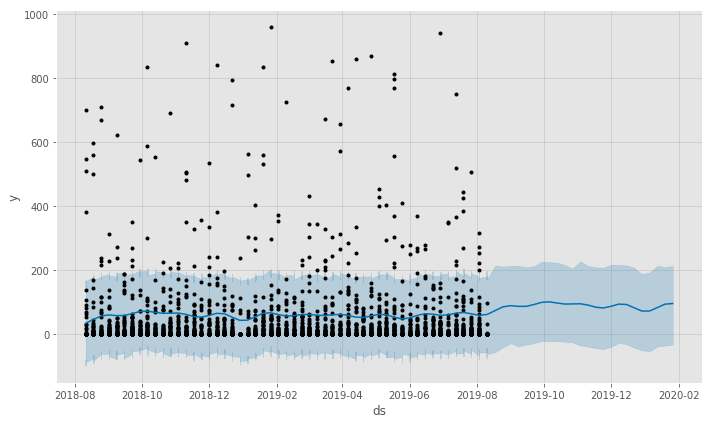

In [33]:
#m.set_xlim([0, 10])

fig2 = m2.plot(forecast, uncertainty = True)


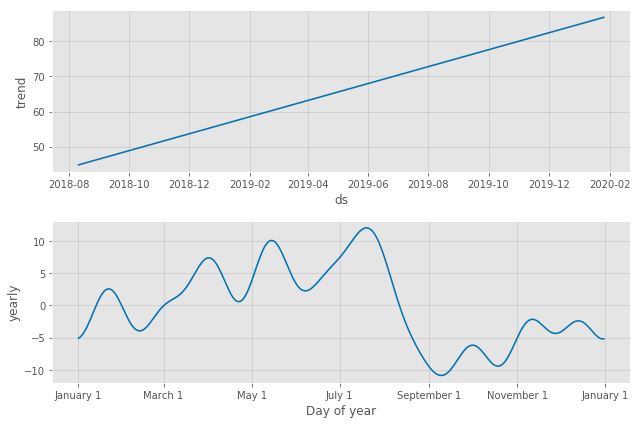

In [34]:

fig2 = m2.plot_components(forecast)


SOME ADDITIONAL VISUALIZATIONS FOR DATA ANALYSIS PRIOR TO MODELING

In [35]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [36]:
df.head()

,work_center,week_ending,work_product_code,sum_of_std_hours,sum_of_ot_hours,sum_of_dt_hrs,sum_of_total_hrs,comp_work,ptb_percentage,defects,sum_of_rework_hrs,sum_of_repair_hrs,sum_of_refab_hrs,tot_rwk_hrs,total_def_cost,pq1k
0,410034,2019-07-20,BA,0.7,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,410035,2019-07-20,BA,0.7,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J0022701,2018-08-25,BW,6.5,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J0022709,2018-12-22,BW,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,J0040402,2019-04-13,WA,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


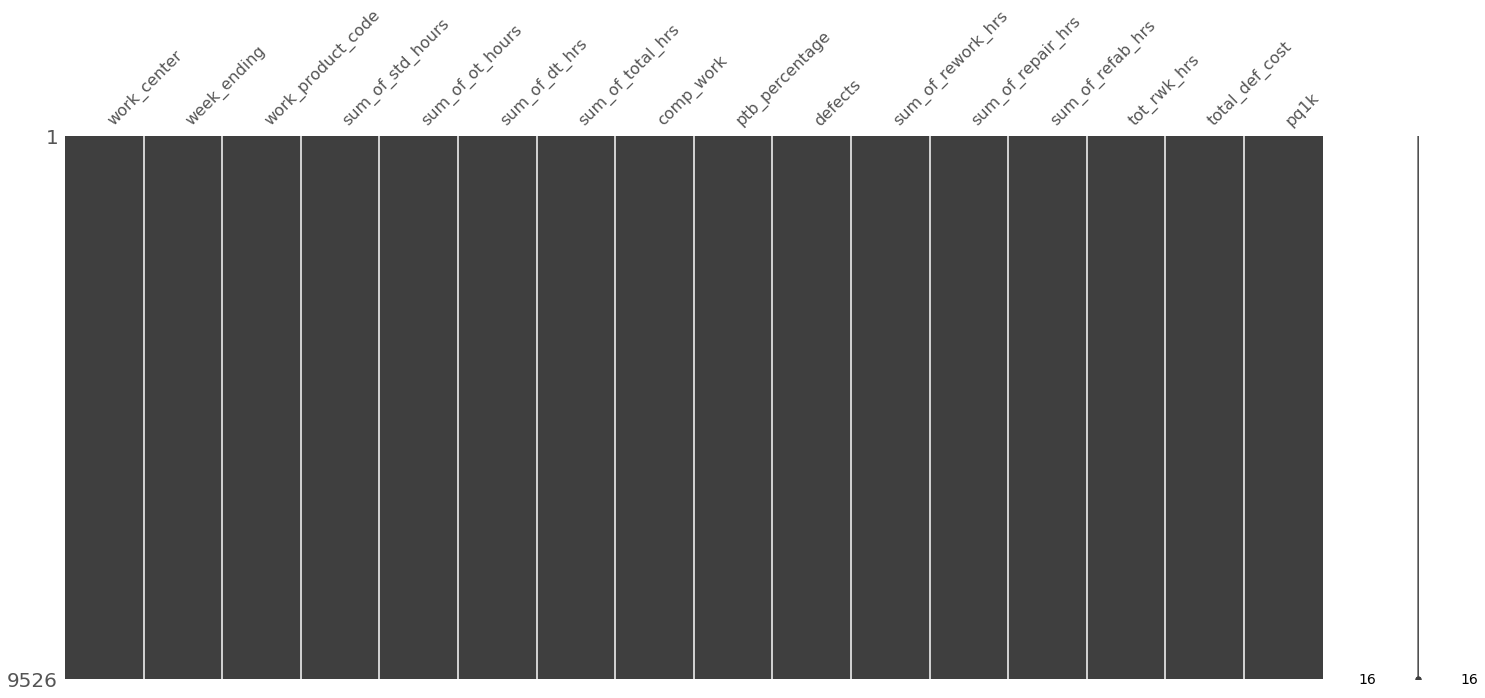

In [37]:
#Data completeness chart after filling in na with zeros

#Look at distribution of missing data among rows and columns
import missingno as msno
#Source: https://github.com/ResidentMario/missingno

#Black = data present
#White = NaN values
#sns.heatmap(df.isnull(), cbar = False)
msno.matrix(df)

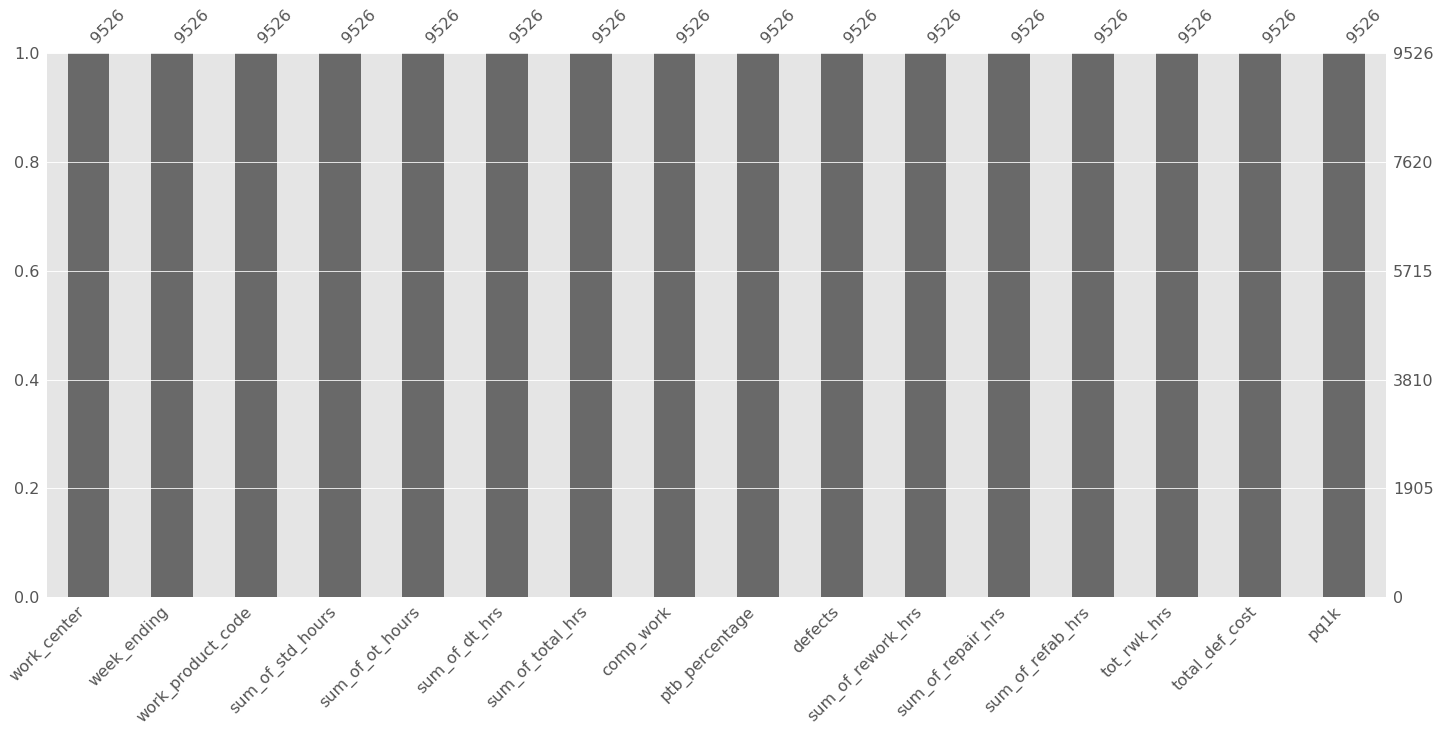

In [38]:
#Proportion of data (by column) with data
msno.bar(df)

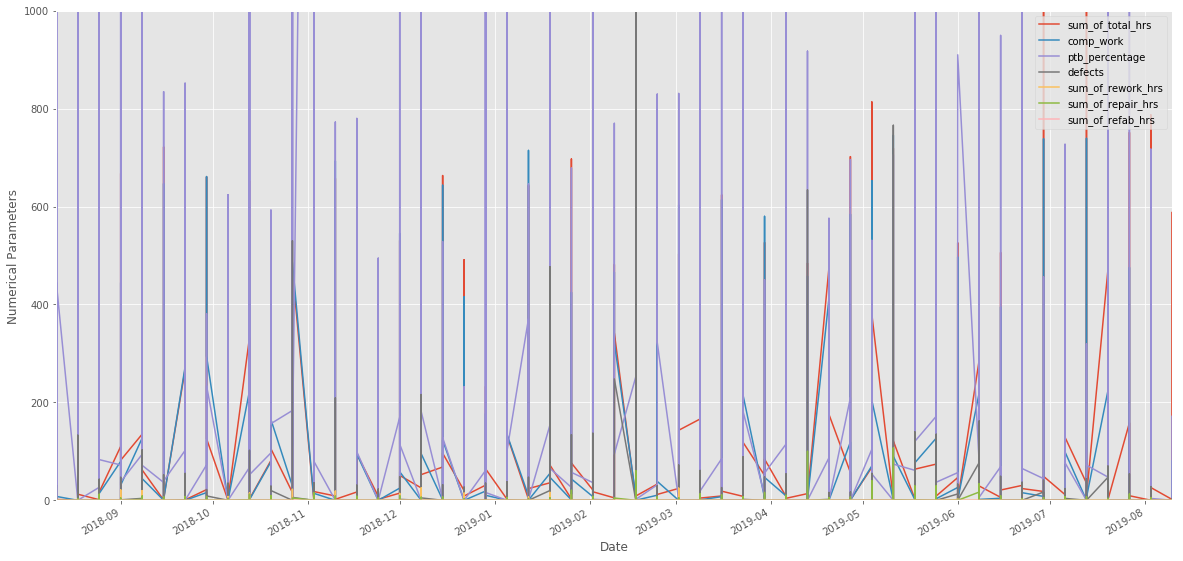

In [39]:
dfcht=df.drop(columns = ['pq1k','total_def_cost','tot_rwk_hrs','sum_of_dt_hrs','sum_of_ot_hours','sum_of_std_hours'])

ax = dfcht.set_index('week_ending').plot(figsize=(20, 10))
ax.set_ylim([0, 1000])
ax.set_ylabel('Numerical Parameters')
ax.set_xlabel('Date')

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:913: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0

/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:913: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0



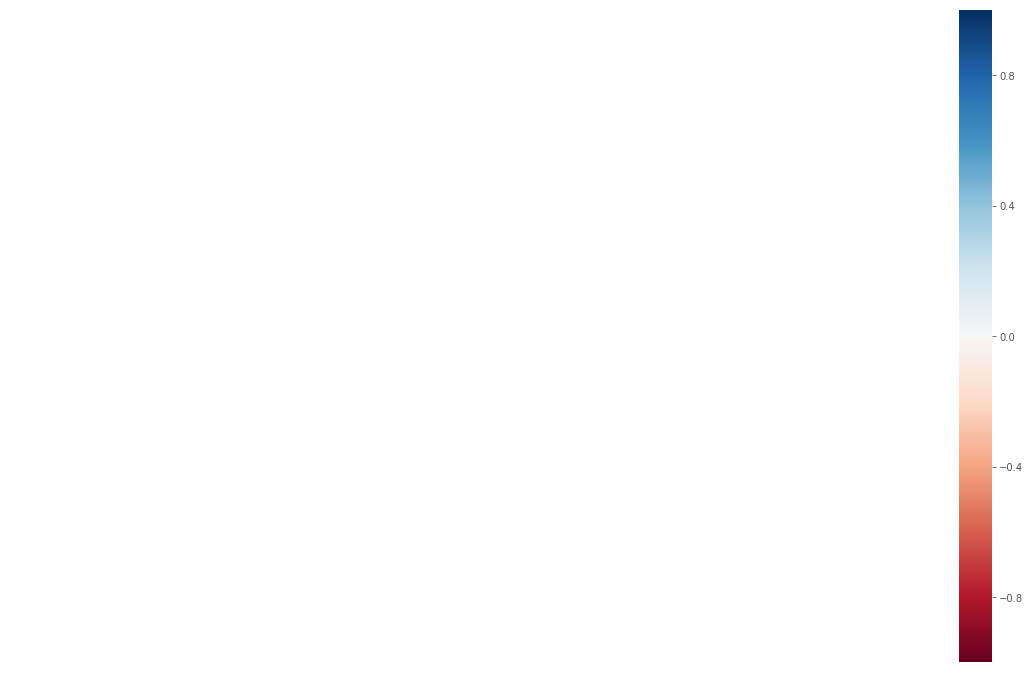

In [40]:
msno.heatmap(dfcht)